In [157]:
import random
from qiskit.transpiler import CouplingMap
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes.routing.sabre_swap_v0_20_      import SabreSwap as SabreSwap_v0_20
from qiskit.transpiler.passes.routing.sabre_swap_v0_20_depth import SabreSwap as SabreSwap_v0_20_depth
from qiskit.transpiler.passes import ApplyLayout, FullAncillaAllocation, \
                                     EnlargeWithAncilla
from qiskit.transpiler.passes.layout.sabre_layout    import SabreLayout
from experiment_setup.coupling_maps.coupling_maps_files import file_to_coupling_map
from zou_circuits import create_parallel_circuit, apply_swaps_and_get_matching_circuit
from IPython.display import display

random.seed(42)

# Setup for the circuit and coupling map


In [158]:
num_layers = 3
num_qubits = 12
cm_type = "ring"

## Generated the parallel circuit
- qc is generated circuit
- matching_circuit is the circuit after applying the swaps 
- qc_transpiled is the matching_circuit transpiled under Sabre v0.20
- qc_transpiled_depth is the matching_circuit transpiled under Sabre depth

In [159]:
if cm_type == "ring":
    cm = CouplingMap.from_ring(num_qubits)
elif cm_type == "grid":
    cm = CouplingMap.from_grid(5, 5)
elif cm_type == "heavy_hex":
    cp_str  = "heavy_hex_027"
    cm_filename = f"experiment_setup/coupling_maps/{cp_str}.txt"
    cm = file_to_coupling_map(cm_filename)
else:
    raise ValueError(f"Unknown coupling map type: {cm_type}")

# Create the circuit
qc = create_parallel_circuit(num_qubits, num_layers, cm)
# Get the matching circuit after swaps are applied
matching_circuit = apply_swaps_and_get_matching_circuit(qc)

# Get transpiled circuit of the matching circuit using Sabre
rp = SabreSwap_v0_20(cm, seed=42)
lp = SabreLayout(cm, routing_pass=rp, seed=42)
pm = PassManager([
    lp,
    FullAncillaAllocation(cm),
    EnlargeWithAncilla(),
    ApplyLayout(),
    rp
])
qc_transpiled = pm.run(matching_circuit)

# Get transpiled circuit of the matching circuit using Sabre Depth
rp_depth = SabreSwap_v0_20_depth(cm, seed=42)
lp_depth = SabreLayout(cm, routing_pass=rp_depth, seed=42)
pm_depth = PassManager([
    lp_depth,
    FullAncillaAllocation(cm),
    EnlargeWithAncilla(),
    ApplyLayout(),
    rp_depth
])
qc_transpiled_depth = pm_depth.run(matching_circuit)


Original Circuit:


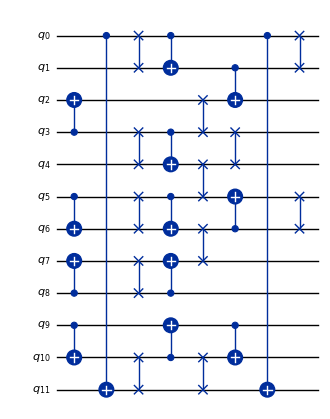


Modified Circuit after applying SWAPs:


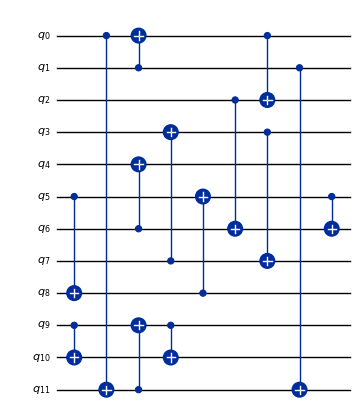

In [160]:
# Print the original and modified circuits
print("Original Circuit:")
display(qc.draw(output="mpl", fold=-1, scale=0.5))
print("\nModified Circuit after applying SWAPs:")
display(matching_circuit.draw(output="mpl", fold=-1, scale=0.5))


Transpiled Circuit of the modified circuit:


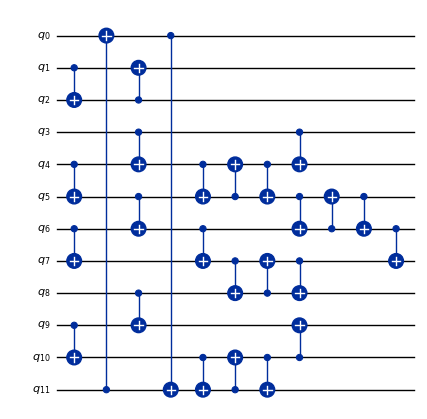


Transpiled Circuit of the modified circuit using Sabre with depth:


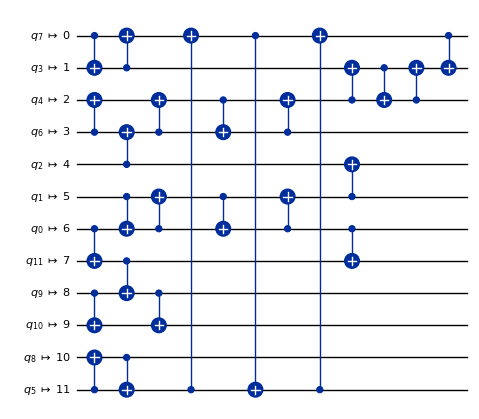

In [161]:
print("\nTranspiled Circuit of the modified circuit:")
display(qc_transpiled.decompose().draw(output="mpl", fold=-1, scale=0.5))
print("\nTranspiled Circuit of the modified circuit using Sabre with depth:")
display(qc_transpiled_depth.draw(output="mpl", fold=-1, scale=0.5))

In [163]:
print(f"\nOriginal Circuit Depth:                                   {qc.depth()}")
print(f"    Decomposed Depth:                                     {qc.decompose().depth()}")

print(f"\nTranspiled Circuit Decomposed Depth using Sabre:          {qc_transpiled.decompose().depth()}")

print(f"\nTranspiled Circuit Decomposed Depth using Sabre w/ depth: {qc_transpiled_depth.depth():<10}")

print(f"\nModified Circuit Depth:                                   {matching_circuit.depth():<10}")


Original Circuit Depth:                                   6
    Decomposed Depth:                                     12

Transpiled Circuit Decomposed Depth using Sabre:          9

Transpiled Circuit Decomposed Depth using Sabre w/ depth: 9         

Modified Circuit Depth:                                   3         
